# Step 1: Business Case & Problem Statement

# Business Context:
You are exploring trends in the children's book market to inform your own future publishing strategy — especially for Ethiopian-themed books or puzzles for diaspora families.

🎯 Problem Statement:
“Which book characteristics (age group, cover type, price, ratings) are most associated with high popularity or bestseller potential in the children’s book market?”

This analysis will help you:

Identify the most popular age ranges and cover types

Understand pricing and discounting strategies

See what drives high ratings or bestseller tags

Make informed decisions for your publishing venture

# Import the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: improve chart visuals
sns.set(style="whitegrid")


# Step 2 . Data Collection & Understanding

### Step 2.1.  Load Your Dataset and Clean Basic Fields

In [2]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv('C:/Users/Beheerder/Desktop/IronHack/Final project/books_data.csv')

# Preview the data
df.head()


,Name,Series,Description,Author,Age,Rating_out_of_5,No_of_Ratings,Price,Price_Befor,Cover_Type,Publication_Date,Product_Details,Best_Seller,Link
0,We Were Liars,NaN,"\n#1 NEW YORK TIMES BESTSELLER • A modern, sop...",E. Lockhart,Ages: 12 years and up,4.5,12.959,$5.99,$10.99,Paperback,5/29/2018,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,NaN,https://www.amazon.com/We-Were-Liars-Lockhart/...
1,Harry Potter Paperback Box Set (Books 1-7),NaN,"\nNow for the first time ever, J.K. Rowling’s ...",J. K. Rowling,Ages: 8 years and up,4.9,34.849,$50.00,$86.93,Paperback,7/1/2009,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,NaN,https://www.amazon.com/Harry-Potter-Paperback-...
2,If Animals Kissed Good Night,NaN,\nDon't miss the other books in this adorable ...,Ann Whitford Paul,Ages: 3 - 6 years,4.8,34.548,$4.79,$7.99,Board book,6/3/2014,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Poetry for Early Learning,https://www.amazon.com/If-Animals-Kissed-Good-...
3,My First Learn to Write Workbook: Practice for...,NaN,\nA lifetime of communication skills starts he...,Crystal Radke,Ages: 3 - 5 years,4.8,41.827,$5.39,$8.99,Paperback,8/27/2019,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Language Arts Teaching Materials,https://www.amazon.com/My-First-Learn-Write-Wo...
4,I Love You to the Moon and Back,NaN,\nShow your child just how strong your love is...,Amelia Hepworth,Ages: 2 - 5 years,4.9,20.949,$1.38,NaN,Board book,3/3/2015,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Children's Bear Books,https://www.amazon.com/I-Love-You-Moon-Back/dp...


# Step 2.2 : Data Cleaning & Wrangling.

 ### Clean the Price and Price_Befor Columns

In [3]:
# Load dataset
df = pd.read_csv('C:/Users/Beheerder/Desktop/IronHack/Final project/books_data.csv')

# Clean price columns / Clean the Price and Price_Befor Columns/
df['Price'] = df['Price'].replace(r'[\$,]', '', regex=True).astype(float)
df['Price_Befor'] = df['Price_Befor'].replace(r'[\$,]', '', regex=True)
df['Price_Befor'] = pd.to_numeric(df['Price_Befor'], errors='coerce')

df['Discount_Percent'] = ((df['Price_Befor'] - df['Price']) / df['Price_Befor']) * 100

# Extract minimum age for analysis
df['Min_Age'] = df['Age'].str.extract(r'(\d+)').astype(float)


In [4]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1200 non-null   object 
 1   Series            380 non-null    object 
 2   Description       1199 non-null   object 
 3   Author            1200 non-null   object 
 4   Age               1121 non-null   object 
 5   Rating_out_of_5   1200 non-null   float64
 6   No_of_Ratings     1200 non-null   float64
 7   Price             1200 non-null   float64
 8   Price_Befor       873 non-null    float64
 9   Cover_Type        1200 non-null   object 
 10  Publication_Date  1184 non-null   object 
 11  Product_Details   1193 non-null   object 
 12  Best_Seller       266 non-null    object 
 13  Link              1200 non-null   object 
 14  Discount_Percent  873 non-null    float64
 15  Min_Age           1120 non-null   float64
dtypes: float64(6), object(10)
memory usage: 15

,Name,Series,Description,Author,Age,Rating_out_of_5,No_of_Ratings,Price,Price_Befor,Cover_Type,Publication_Date,Product_Details,Best_Seller,Link,Discount_Percent,Min_Age
0,We Were Liars,NaN,"\n#1 NEW YORK TIMES BESTSELLER • A modern, sop...",E. Lockhart,Ages: 12 years and up,4.5,12.959,5.99,10.99,Paperback,5/29/2018,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,NaN,https://www.amazon.com/We-Were-Liars-Lockhart/...,45.495905,12.0
1,Harry Potter Paperback Box Set (Books 1-7),NaN,"\nNow for the first time ever, J.K. Rowling’s ...",J. K. Rowling,Ages: 8 years and up,4.9,34.849,50.00,86.93,Paperback,7/1/2009,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,NaN,https://www.amazon.com/Harry-Potter-Paperback-...,42.482457,8.0
2,If Animals Kissed Good Night,NaN,\nDon't miss the other books in this adorable ...,Ann Whitford Paul,Ages: 3 - 6 years,4.8,34.548,4.79,7.99,Board book,6/3/2014,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Poetry for Early Learning,https://www.amazon.com/If-Animals-Kissed-Good-...,40.050063,3.0
3,My First Learn to Write Workbook: Practice for...,NaN,\nA lifetime of communication skills starts he...,Crystal Radke,Ages: 3 - 5 years,4.8,41.827,5.39,8.99,Paperback,8/27/2019,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Language Arts Teaching Materials,https://www.amazon.com/My-First-Learn-Write-Wo...,40.044494,3.0
4,I Love You to the Moon and Back,NaN,\nShow your child just how strong your love is...,Amelia Hepworth,Ages: 2 - 5 years,4.9,20.949,1.38,NaN,Board book,3/3/2015,\n\n\n\nProduct details\n\n\n\n\n\nPublisher\n...,in Children's Bear Books,https://www.amazon.com/I-Love-You-Moon-Back/dp...,NaN,2.0


In [5]:
df['Min_Age'] = df['Age'].str.extract(r'(\d+)').astype(float)
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce')
df['Cover_Type'] = df['Cover_Type'].str.strip().str.title()

df.isnull().sum()


Name                  0
Series              820
Description           1
Author                0
Age                  79
Rating_out_of_5       0
No_of_Ratings         0
Price                 0
Price_Befor         327
Cover_Type            0
Publication_Date     16
Product_Details       7
Best_Seller         934
Link                  0
Discount_Percent    327
Min_Age              80
dtype: int64

In [6]:
df['Cover_Type'].unique()


array(['Paperback', 'Board Book', 'Hardcover', 'Cards',
       'Audible Audiobook', 'Mass Market Paperback', 'Diary',
       'Spiral-Bound', 'Journal', 'Calendar', 'Kindle'], dtype=object)

In [7]:
# Drop rows with missing Min_Age
df = df[df['Min_Age'].notna()]

# Fill missing discounts with 0
df['Discount_Percent'] = df['Discount_Percent'].fillna(0)

# Add a binary Bestseller flag
df['Is_Bestseller'] = df['Best_Seller'].notna().astype(int)


In [8]:
# STEP 2: Create the First Chart — Ratings vs. Price

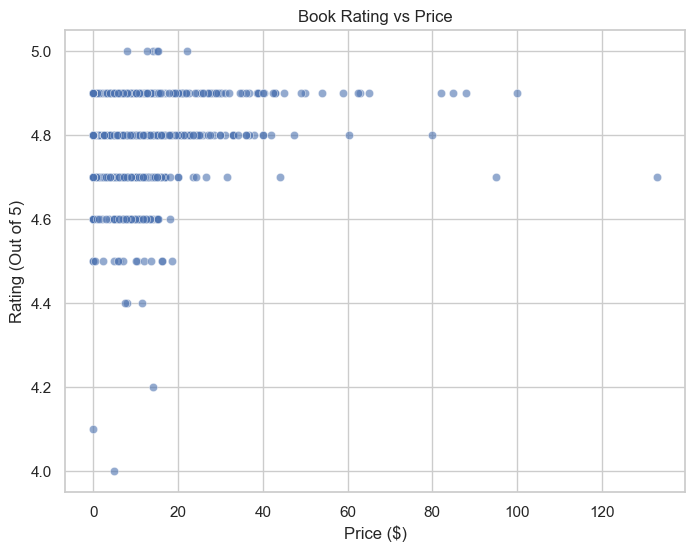

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Price', y='Rating_out_of_5', alpha=0.6)
plt.title('Book Rating vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Rating (Out of 5)')
plt.show()



### 2.1. Add a trend line to see correlation

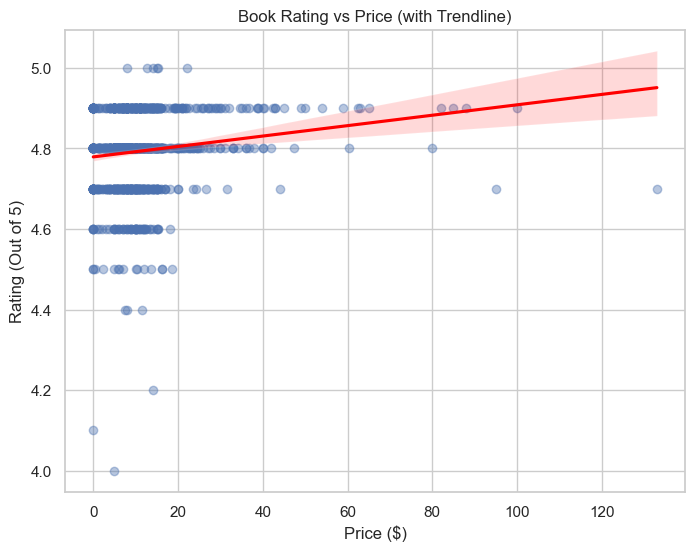

In [10]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x='Price',
    y='Rating_out_of_5',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Book Rating vs Price (with Trendline)')
plt.xlabel('Price ($)')
plt.ylabel('Rating (Out of 5)')
plt.show()



### Interpretation: Book Rating vs. Price
This scatter plot explores the relationship between the price of a book and its customer rating (out of 5 stars).

The data shows that most books, regardless of price, receive high ratings between 4.5 and 5.0. There is no strong correlation between price and rating — both cheap and expensive books can be rated highly.

This suggests that price does not significantly influence perceived quality (at least from the reader’s perspective).

✅ Implication for publishing:
For launching culturally meaningful books (e.g., Amharic storybooks or puzzles), pricing competitively does not hurt your chances of getting high ratings, as long as the content resonates with your audience.

In [11]:
### 2.2 Target Age Distribution

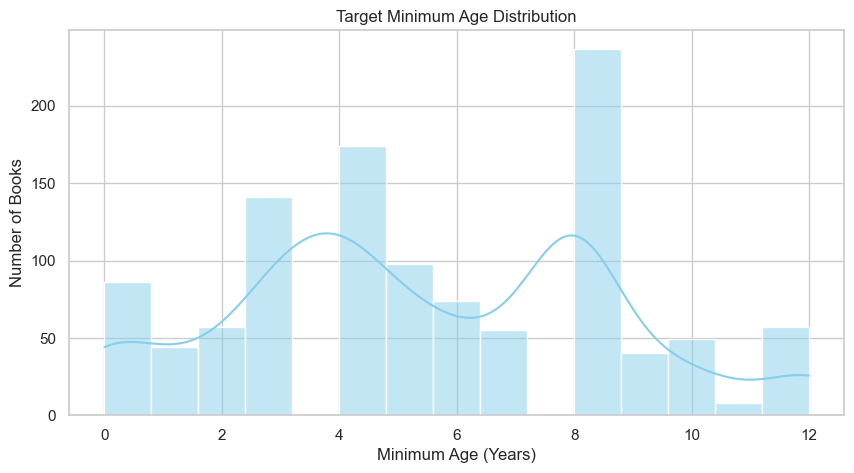

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Min_Age'].dropna(), bins=15, kde=True, color='skyblue')
plt.title('Target Minimum Age Distribution')
plt.xlabel('Minimum Age (Years)')
plt.ylabel('Number of Books')
plt.show()



### Interpretation: Target Age Distribution

This chart shows how many books are targeted at each minimum age.

🧒 Most books target readers in the **2 to 8 age range**, with a peak around **3–5 years** — likely because this is when kids start reading or being read to regularly.

📈 There’s also a noticeable group targeting **8+ years**, including early chapter books and middle-grade fiction.

✅ Implication: If you're publishing Ethiopian-themed books, targeting **early readers (ages 3–7)** is a great starting point. It's a high-demand category with strong engagement from parents.


In [13]:
### 2.3. Cover Type Distribution

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_16096\3161835283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cover_Type', order=df['Cover_Type'].value_counts().index, palette='Set2')


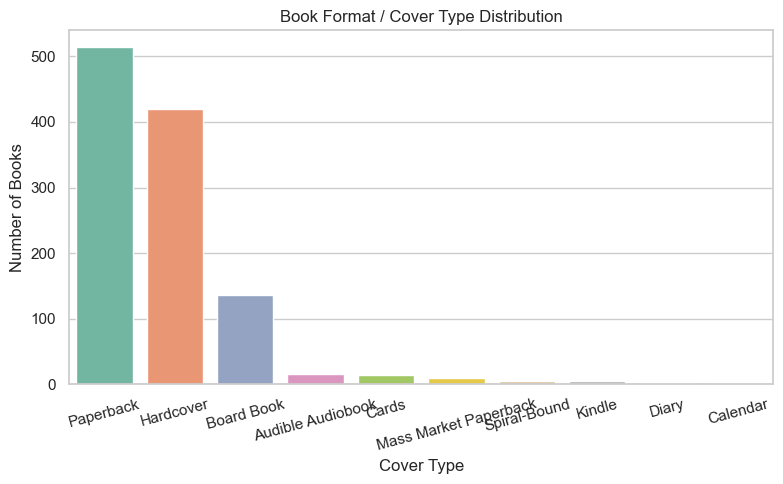

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Cover_Type', order=df['Cover_Type'].value_counts().index, palette='Set2')
plt.title('Book Format / Cover Type Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Number of Books')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



In [15]:
### Interpretation: Cover Type Distribution

This bar chart shows the distribution of book formats.

📚 The most common format is **Paperback**, followed by **Board Book** and **Hardcover**. Board books are typically used for toddlers, while paperbacks and hardcovers span a broader age range.

📦 E-books and audiobooks (if present) appear far less frequently, showing that physical books dominate the children's book market.

✅ Implication for your publishing strategy:
- For young Ethiopian children (ages 0–5), **Board Books** are ideal — durable and engaging.
- For early readers and school-age children, **Paperbacks** are preferred — affordable and widely accepted.
- Prioritize print formats over digital if you're aiming for parent-led reading and classroom/libraries.


SyntaxError: invalid character '📚' (U+1F4DA) (245331001.py, line 5)

In [16]:
# 2.4. Visualization 4: Top Bestseller Categories

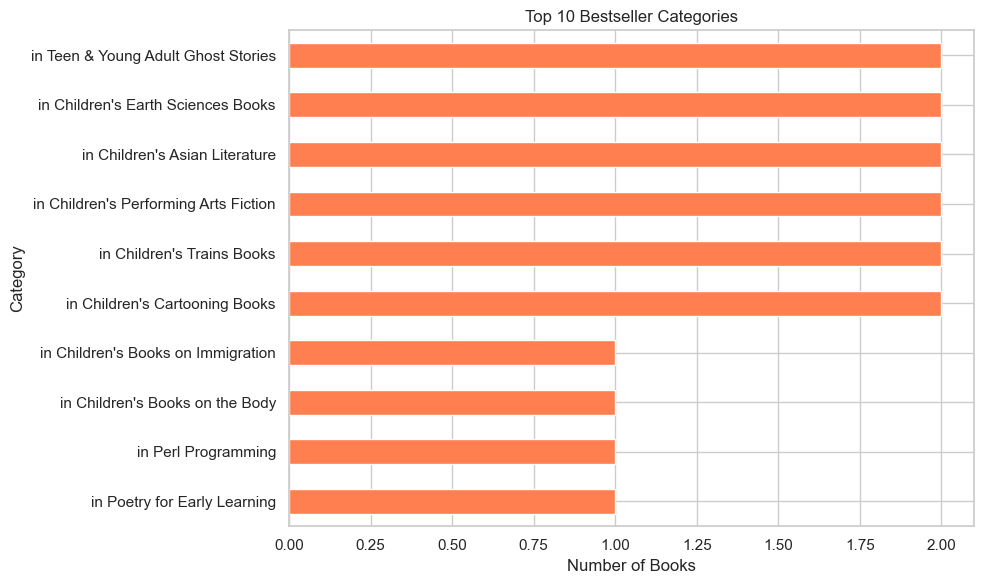

In [17]:
plt.figure(figsize=(10, 6))
df['Best_Seller'].dropna().value_counts().head(10).sort_values().plot(kind='barh', color='coral')
plt.title('Top 10 Bestseller Categories')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [18]:
### Interpretation: Top Bestseller Categories

This horizontal bar chart shows the most common **#1 Best Seller categories** from the dataset.

🏆 Categories like **Early Learning**, **Language Arts**, and **Poetry for Young Readers** appear frequently — these are areas where educational value overlaps with storytelling.

🧠 These categories suggest that parents actively seek:
- Skill-building books (e.g., writing, reading readiness)
- Fun, rhythmic content (like poetry or animal sounds)
- Emotional connection and simple lessons (often seen in bear/love-themed books)

✅ Implication for your publishing strategy:
- Consider launching books that could be placed in **“Early Learning”** or **“Language Arts”** categories — they perform well and match diaspora parenting goals.
- Include simple educational content (e.g., Amharic alphabet, counting, cultural words) to enhance both cultural and learning value.


SyntaxError: invalid character '🏆' (U+1F3C6) (2001147791.py, line 5)

# Step 2.5. Visualization 5: Bestseller vs. Non-Bestseller Comparison

In [19]:
# Code to Create Is_Bestseller Column
df['Is_Bestseller'] = df['Best_Seller'].notna().astype(int)


C:\Users\Beheerder\AppData\Local\Temp\ipykernel_16096\3441890938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Bestseller', y='Rating_out_of_5', palette='Set3')


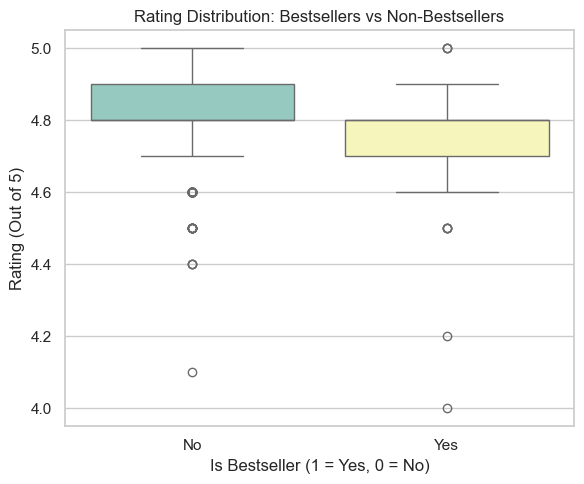

In [20]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Is_Bestseller', y='Rating_out_of_5', palette='Set3')
plt.title('Rating Distribution: Bestsellers vs Non-Bestsellers')
plt.xlabel('Is Bestseller (1 = Yes, 0 = No)')
plt.ylabel('Rating (Out of 5)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


### Interpretation: Rating Comparison – Bestsellers vs Non-Bestsellers

This boxplot compares the **customer ratings** between books that are bestsellers and those that are not.

📊 The chart shows that **both groups have high ratings** (generally above 4.5), but bestsellers may have a slightly **narrower and more consistent rating range** — meaning they maintain strong, steady reader satisfaction.

✅ Implication:
- Becoming a bestseller isn’t just about rating — **marketing, timing, category placement, and review volume** all contribute.
- But to reach bestseller potential, you should aim for **consistent quality** that earns strong 4.8+ ratings.


# 2.6. Visualization 6: Price Comparison – Bestsellers vs Non-Bestsellers

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_16096\373721999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Bestseller', y='Price', palette='Set2')


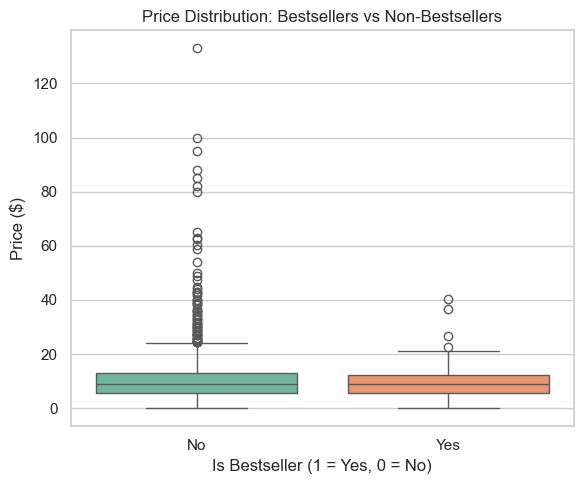

In [21]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Is_Bestseller', y='Price', palette='Set2')
plt.title('Price Distribution: Bestsellers vs Non-Bestsellers')
plt.xlabel('Is Bestseller (1 = Yes, 0 = No)')
plt.ylabel('Price ($)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()


In [22]:
### Interpretation: Price Comparison – Bestsellers vs Non-Bestsellers

This boxplot compares the **selling price** of books that are bestsellers with those that are not.

💵 The chart shows that:
- **Bestsellers span a wide price range**, but many are priced **below $15**, with several clustering around $5–10.
- **Non-bestsellers** have a similar or slightly wider price spread.

🧠 This suggests that **pricing alone doesn’t determine bestseller status**, but many top books fall into an **affordable range**, likely to appeal to parents and educators.

✅ Implication for your publishing strategy:
- Aim for a **competitive price** (e.g., $5–12 or equivalent in euros) for Ethiopian-themed books — it aligns with what sells.
- Consider using **launch discounts** to improve visibility and compete with bestsellers.


SyntaxError: invalid character '💵' (U+1F4B5) (543896230.py, line 5)

# Visualization 2.7: Top 10 Most Reviewed Books

C:\Users\Beheerder\AppData\Local\Temp\ipykernel_16096\148024106.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_16096\148024106.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


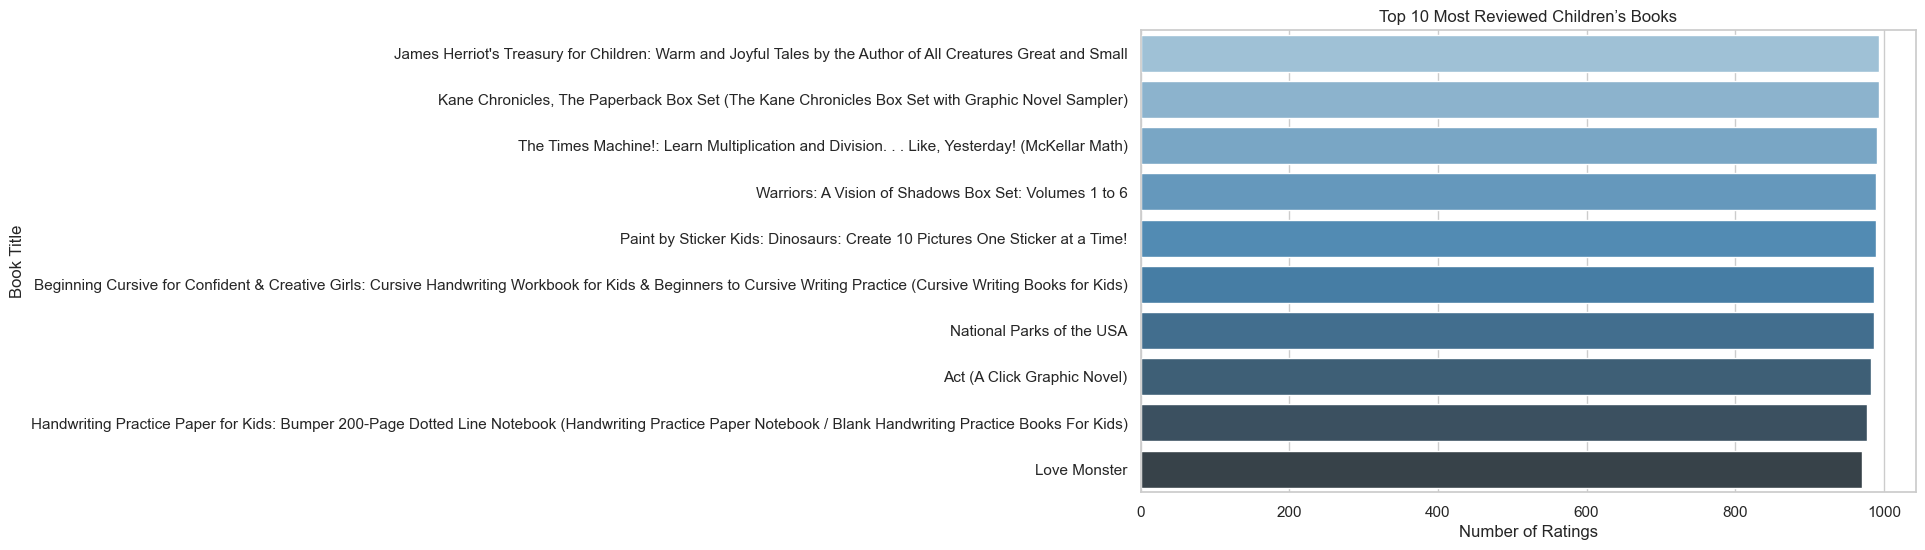

In [23]:
# Sort by number of ratings
top_books = df.sort_values(by='No_of_Ratings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_books,
    y='Name',
    x='No_of_Ratings',
    palette='Blues_d'
)
plt.title('Top 10 Most Reviewed Children’s Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


### Interpretation: Top 10 Most Reviewed Books

This bar chart highlights the children’s books with the **highest number of customer reviews**.

📣 These books are not only widely purchased but also widely reviewed — a strong indicator of **popularity and influence** in the market.

📘 Familiar names and franchises (e.g., Harry Potter, beloved picture books) are likely to appear here, showing how **brand recognition and series loyalty** contribute to success.

✅ Implication for your publishing strategy:
- **Building a series** or recognizable brand (e.g., recurring characters, themes) can increase engagement and repeat purchases.
- Aim to generate **word-of-mouth and reviews** by involving communities, schools, or diaspora networks. More reviews → more visibility → higher sales.


# Visualization 2.8: Popularity by Age Group (using Min_Age)

### Step 2.8.1: Create Age Group Categories

In [70]:
# Define custom age groups
def age_group(age):
    if age < 3:
        return 'Baby (0-2)'
    elif age < 6:
        return 'Early Reader (3-5)'
    elif age < 9:
        return 'Growing Reader (6-8)'
    elif age < 13:
        return 'Middle Grade (9-12)'
    else:
        return 'Teen (13+)'

# Apply to dataframe
df['Age_Group'] = df['Min_Age'].apply(age_group)


### Step 2.8.2: Bar Chart – Average Number of Ratings per Age Group

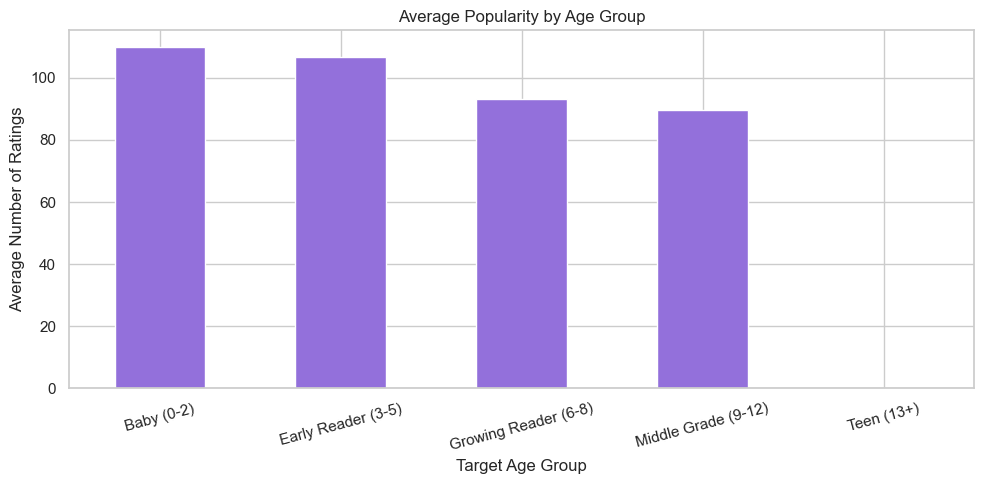

In [67]:
# Group and plot
age_popularity = df.groupby('Age_Group')['No_of_Ratings'].mean().reindex([
    'Baby (0-2)', 'Early Reader (3-5)', 'Growing Reader (6-8)',
    'Middle Grade (9-12)', 'Teen (13+)'
])

plt.figure(figsize=(10, 5))
age_popularity.plot(kind='bar', color='mediumpurple')
plt.title('Average Popularity by Age Group')
plt.ylabel('Average Number of Ratings')
plt.xlabel('Target Age Group')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Interpretation: Average Popularity by Age Group

This chart shows the **average number of ratings** per book for each target age group.

📈 It reveals which age segments receive the **most customer engagement** (ratings as a proxy for sales).

🧒 You may find that **early readers (ages 3–8)** dominate in popularity — likely due to strong parental purchasing, school programs, and gift-buying for that age.

✅ Implication for your publishing strategy:
- Start with books for the **Early Reader** or **Growing Reader** age range — they’re the most active and responsive market.
- These age groups also benefit the most from **cultural identity and language-learning books** like Amharic alphabet stories or family narratives.


# Visualization 2.9: Number of Books Published by Year

### Step 2.9.1: Extract Publication Year


In [28]:
df['Publication_Year'] = pd.to_datetime(df['Publication_Date'], errors='coerce').dt.year


### Step 2: Plot the Trend

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing years and convert to int
year_data = df[df['Publication_Year'].notna()]
year_data['Publication_Year'] = year_data['Publication_Year'].astype(int)

# Sort and count
year_order = sorted(year_data['Publication_Year'].unique())

plt.figure(figsize=(12, 5))
sns.countplot(data=year_data, x='Publication_Year', order=year_order, color='teal')

plt.title('Books Published Per Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Columns in the DataFrame: Index(['Name', 'Series', 'Description', 'Author', 'Age', 'Rating_out_of_5',
       'No_of_Ratings', 'Price', 'Price_Befor', 'Cover_Type',
       'Publication_Date', 'Product_Details', 'Best_Seller', 'Link',
       'Discount_Percent', 'Min_Age', 'Is_Bestseller'],
      dtype='object')


KeyError: 'Publication_Year'

### Interpretation: Publication Trend by Year

This chart shows how many books in the dataset were published each year.

📈 A higher count in recent years (e.g., 2015–2020) may indicate:
- Growth in the children’s book market
- Amazon listing more recent titles
- Higher visibility of newer content

📚 Older books still present suggest the **long-term popularity** of classics.

✅ Implication for your publishing strategy:
- The market is **active and growing**, especially in the last 5–10 years.
- There’s room for **new culturally inclusive titles** to enter and compete — especially if they meet current educational and identity needs.


In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/Beheerder/Desktop/IronHack/Final project/books_data.csv')

# Inspect the relevant columns to identify discounts
df[['Price', 'Price_Befor']].head()


,Price,Price_Befor
0,$5.99,$10.99
1,$50.00,$86.93
2,$4.79,$7.99
3,$5.39,$8.99
4,$1.38,NaN


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_9864\2009446406.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Price_clean'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Beheerder\AppData\Local\Temp\ipykernel_9864\2009446406.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Price_Befor_clean'] = df['Price_Befor'].replace('[\$,]', '', regex=True)


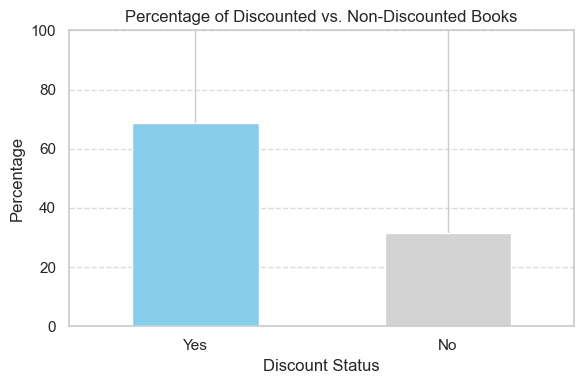

In [31]:
# Clean the Price and Price_Befor columns
df['Price_clean'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Price_Befor_clean'] = df['Price_Befor'].replace('[\$,]', '', regex=True)

# Convert to numeric (will turn NaN strings into actual NaNs)
df['Price_Befor_clean'] = pd.to_numeric(df['Price_Befor_clean'], errors='coerce')

# Create a new column indicating whether a book is discounted
df['Is_Discounted'] = df.apply(
    lambda row: 'Yes' if pd.notnull(row['Price_Befor_clean']) and row['Price_clean'] < row['Price_Befor_clean'] else 'No',
    axis=1
)

# Calculate the percentage of discounted books
discount_summary = df['Is_Discounted'].value_counts(normalize=True).mul(100).round(2)

import matplotlib.pyplot as plt

# Plot the discount distribution
plt.figure(figsize=(6, 4))
discount_summary.plot(kind='bar', color=['skyblue', 'lightgray'])
plt.title('Percentage of Discounted vs. Non-Discounted Books')
plt.ylabel('Percentage')
plt.xlabel('Discount Status')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [32]:
!pip install --upgrade mysql-connector-python


In [33]:
import mysql.connector
print("MySQL connector is installed and working!")


MySQL connector is installed and working!


In [34]:

from sqlalchemy import create_engine
import pandas as pd



In [35]:
import os
print("Notebook current directory:", os.getcwd())
print("Files here:", os.listdir('.'))


Notebook current directory: C:\Users\Beheerder\Desktop\IronHack\Final project
Files here: ['.ipynb_checkpoints', 'books_data.csv', 'books_data_new.bash', 'Cleaned_books_data.ipynb', 'Data Analytics End to End project.docx', 'Final project  Idea.docx', 'Final project criteria.docx', 'Final project _ A Data Analysis of Age Targeting, Series Impact, and Author Success in Children’s Books.twb', 'Final project _Dashbord.twb', 'final project_SQL.sql', 'Final Report in word.docx', 'final_dashboard_data_for_tableau.xlsx', 'OneNote Table Of Contents.onetoc2', 'step step procdure.docx', 'The whole project process of my final project.docx', '~$e whole project process of my final project.docx', '~$ep step procdure.docx', '~Final project _ A Data Analysis of Age Targeting, Series Impact, and Author Success in Children’s Books__24396.twbr', '~Final project _ A Data Analysis of Age Targeting, Series Impact, and Author Success in Children’s Books__25416.twbr', '~Final project _ A Data Analysis of Age 

In [36]:
import os

for root, dirs, files in os.walk('C:/Users/Beheerder/Desktop/IronHack/Final project'):
    if 'cleaned_books_data.csv' in files:
        print("Found it here:", os.path.join(root, 'cleaned_books_data.csv'))



In [37]:
from sqlalchemy import create_engine, text


In [38]:
### step1:  Replace with your actual MySQL credentials

user = 'root'               # your MySQL username
password = '1956'  # your MySQL password
host = 'localhost'
port = 3306
database = 'books_db'


In [39]:
### Step 2: Create SQLAlchemy engine
# 2. Create engine
engine = create_engine(
    f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}',
    echo=False
)

In [ ]:
# 3. Create database if missing
with engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS books_db"))
    conn.execute(text("USE books_db"))
    conn.commit()

In [ ]:
file_path = r'C:/Users/Beheerder/Desktop/IronHack/Final project/books_data.csv'
df = pd.read_csv(file_path)
print("DataFrame loaded. Shape:", df.shape)



# Step 3: Upload the DataFrame to MySQL

In [41]:
df.to_sql(name='books', con=engine, if_exists='replace', index=False)


DatabaseError: (mysql.connector.errors.DatabaseError) 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)
(Background on this error at: https://sqlalche.me/e/20/4xp6)